In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
############################################################
'''
Part 1: RK4 Validation with simple spring-damper model + PID control
'''
############################################################

## parameter setup
# Integration parameter 
h=1/100  # step size    (sec)
t0=0    # initial time (sec)
tf=10    # final time (sec)


time=np.linspace(t0,tf,int((tf-t0)/h))

## motion initial state
x_t0=0.0
v_t0=0
a_t0=0

x_target=5.0         # height target [m]

motion_t0=np.array([x_t0,v_t0])
motion_t=np.zeros((len(motion_t0),len(time)))


## PID parameters
kp=0.5
ki=1.0
kd=1.5

integral=0   # initialize the integral
lasterr=0    # for the kd  

In [13]:
# Butcher Array
RK4matrix=np.array([
      [0,0,0,0],
      [1/4,1/4,0,0],
      [27/40,-189/800,729/800,0],       
      [1,214/891,1/33,650/891],       
      [214/891,1/33,650/891,0],      
   ])


def rk4_ex(f,t,x,h,*args):  #*args allows unknown number of arguments
   k1=f(t+h*RK4matrix[0][0],x+h*RK4matrix[0][1],*args)
   k2=f(t+h*RK4matrix[1][0],x+h*k1*RK4matrix[1][1],*args)
   k3=f(t+h*RK4matrix[2][0],x+h*k2*RK4matrix[2][1],*args)
   k4=f(t+h*RK4matrix[3][0],x+h*k3*RK4matrix[3][1],*args)

   xnext=x+h*(k1*RK4matrix[4][0]+k2*RK4matrix[4][1]+k3*RK4matrix[4][2]+k4*RK4matrix[4][3])
   return xnext



def dx(t,motion,dotm,ve,*args):
   #xdot=motion[1]
   #xdotdot=5
   
   xdot=motion[1]
   xdotdot=-3.0*(motion[0]-x_target)-1.5*motion[1]+dotm
   return np.array([xdot,xdotdot])

def PID(x,h,kp,ki,kd):
   global integral, lasterr

   err=x-x_target
   integral=integral+ki*err*h
   derr=(err-lasterr)/h
   
   lasterr=err

   return -(kp*err+kd*derr+ki*integral)


def stateupdate(t,h,motion):
   
   x=motion[0]

   md4n=PID(x,h,kp,ki,kd)
   ve=2.5
   motion_n=rk4_ex(dx,t,motion,h,md4n,ve)


   return motion_n

In [14]:
# Main iteration loop
motion_ti=motion_t0


for ti in range(len(time)-1):
    #
    t=time[ti]

    # calculte the new value (RK4/Algebraic update)
    motion_ti=stateupdate(t,h,motion_ti)

    #store the step
    motion_t[:,ti]=motion_ti

    #print(f'Step {t} of {len(time)-1}'.format())


print("last position is", motion_t[0,-2])

last position is 5.024021615499405


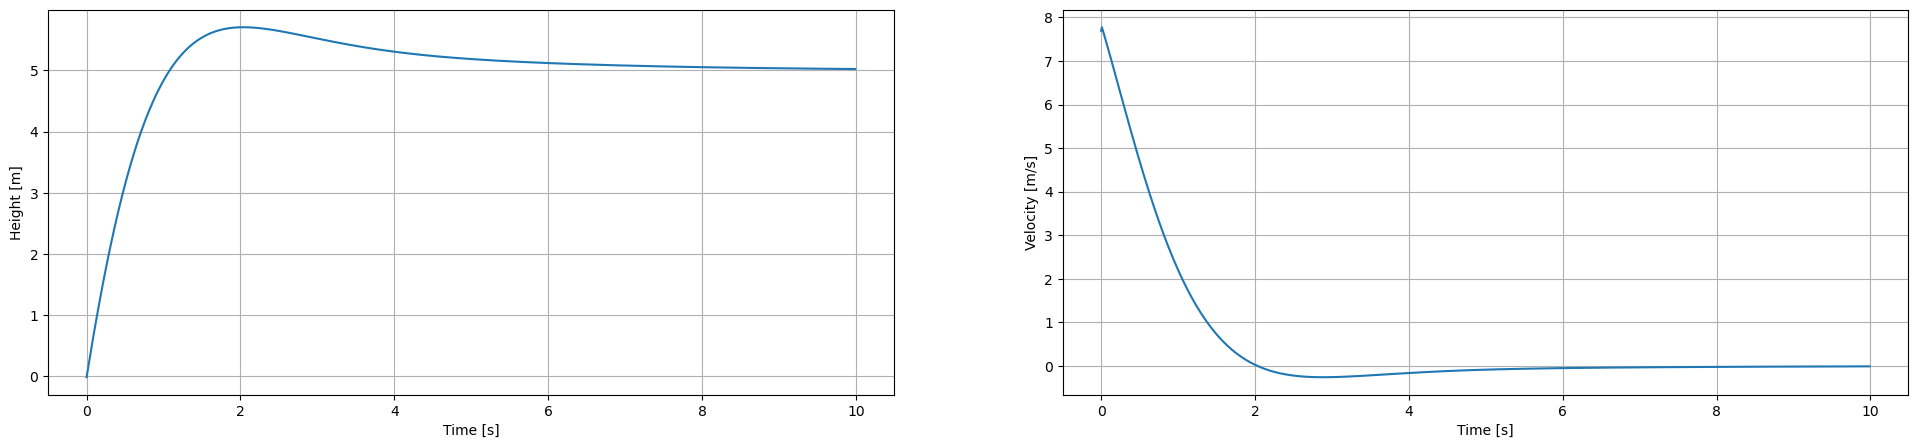

In [15]:
# Visualization

# part 3: motion
plt.figure(figsize=(24,5))
plt.subplot(121)
plt.plot(time[:-1], motion_t[0, :-1], label='x')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()


plt.subplot(122)
plt.plot(time[:-1], motion_t[1, :-1], label='v')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()